In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('apartamentos_clean.csv')

In [5]:
df

,aluguel,condominio,area,bairro,quartos,banheiros,garagem,anunciante
0,4700.0,750.0,82.0,Chácara Santo Antônio,2.0,2.0,2.0,quintoandar
1,3720.0,970.0,50.0,Vila Olímpia,1.0,1.0,0.0,quintoandar
2,3300.0,443.0,85.0,Vila das Mercês,2.0,2.0,1.0,quintoandar
3,1250.0,752.0,35.0,Vila Mascote,1.0,1.0,1.0,quintoandar
4,2835.0,740.0,72.0,Saúde,3.0,2.0,1.0,quintoandar
...,...,...,...,...,...,...,...,...
14473,1800.0,1000.0,80.0,Paraíso,1.0,1.0,1.0,so-flats
14474,3000.0,1750.0,84.0,Panamby,1.0,2.0,2.0,NaN
14475,2650.0,703.0,41.0,Jardim Paulista,1.0,1.0,1.0,quintoandar
14476,1164.0,380.0,35.0,Bom Retiro,1.0,1.0,0.0,quintoandar


In [6]:
con = ['aluguel', 'condominio', 'area']

In [7]:
df = df[(np.abs(stats.zscore(df[con])) < 3).all(axis=1)]
df

,aluguel,condominio,area,bairro,quartos,banheiros,garagem,anunciante
0,4700.0,750.0,82.0,Chácara Santo Antônio,2.0,2.0,2.0,quintoandar
1,3720.0,970.0,50.0,Vila Olímpia,1.0,1.0,0.0,quintoandar
2,3300.0,443.0,85.0,Vila das Mercês,2.0,2.0,1.0,quintoandar
3,1250.0,752.0,35.0,Vila Mascote,1.0,1.0,1.0,quintoandar
4,2835.0,740.0,72.0,Saúde,3.0,2.0,1.0,quintoandar
...,...,...,...,...,...,...,...,...
14473,1800.0,1000.0,80.0,Paraíso,1.0,1.0,1.0,so-flats
14474,3000.0,1750.0,84.0,Panamby,1.0,2.0,2.0,NaN
14475,2650.0,703.0,41.0,Jardim Paulista,1.0,1.0,1.0,quintoandar
14476,1164.0,380.0,35.0,Bom Retiro,1.0,1.0,0.0,quintoandar


A good model will exclude superflouous variables: if a variable is too related to another, why have both?
To exclude them we'll plot the correlation heatmap and do a simple heuristic choosing:

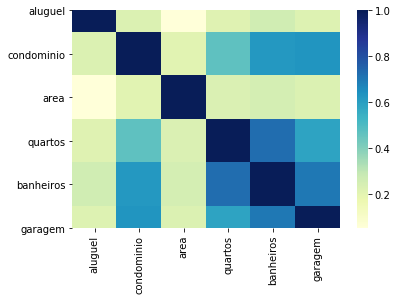

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

We see the attributes `quartos`, `banheiros` and `garagem` are somewhat related. We'll exclude (again, using simple volition) `garagem` and `banheiros`.

Now we'll plot a scatter matrix to see how each variable relates to eachother.

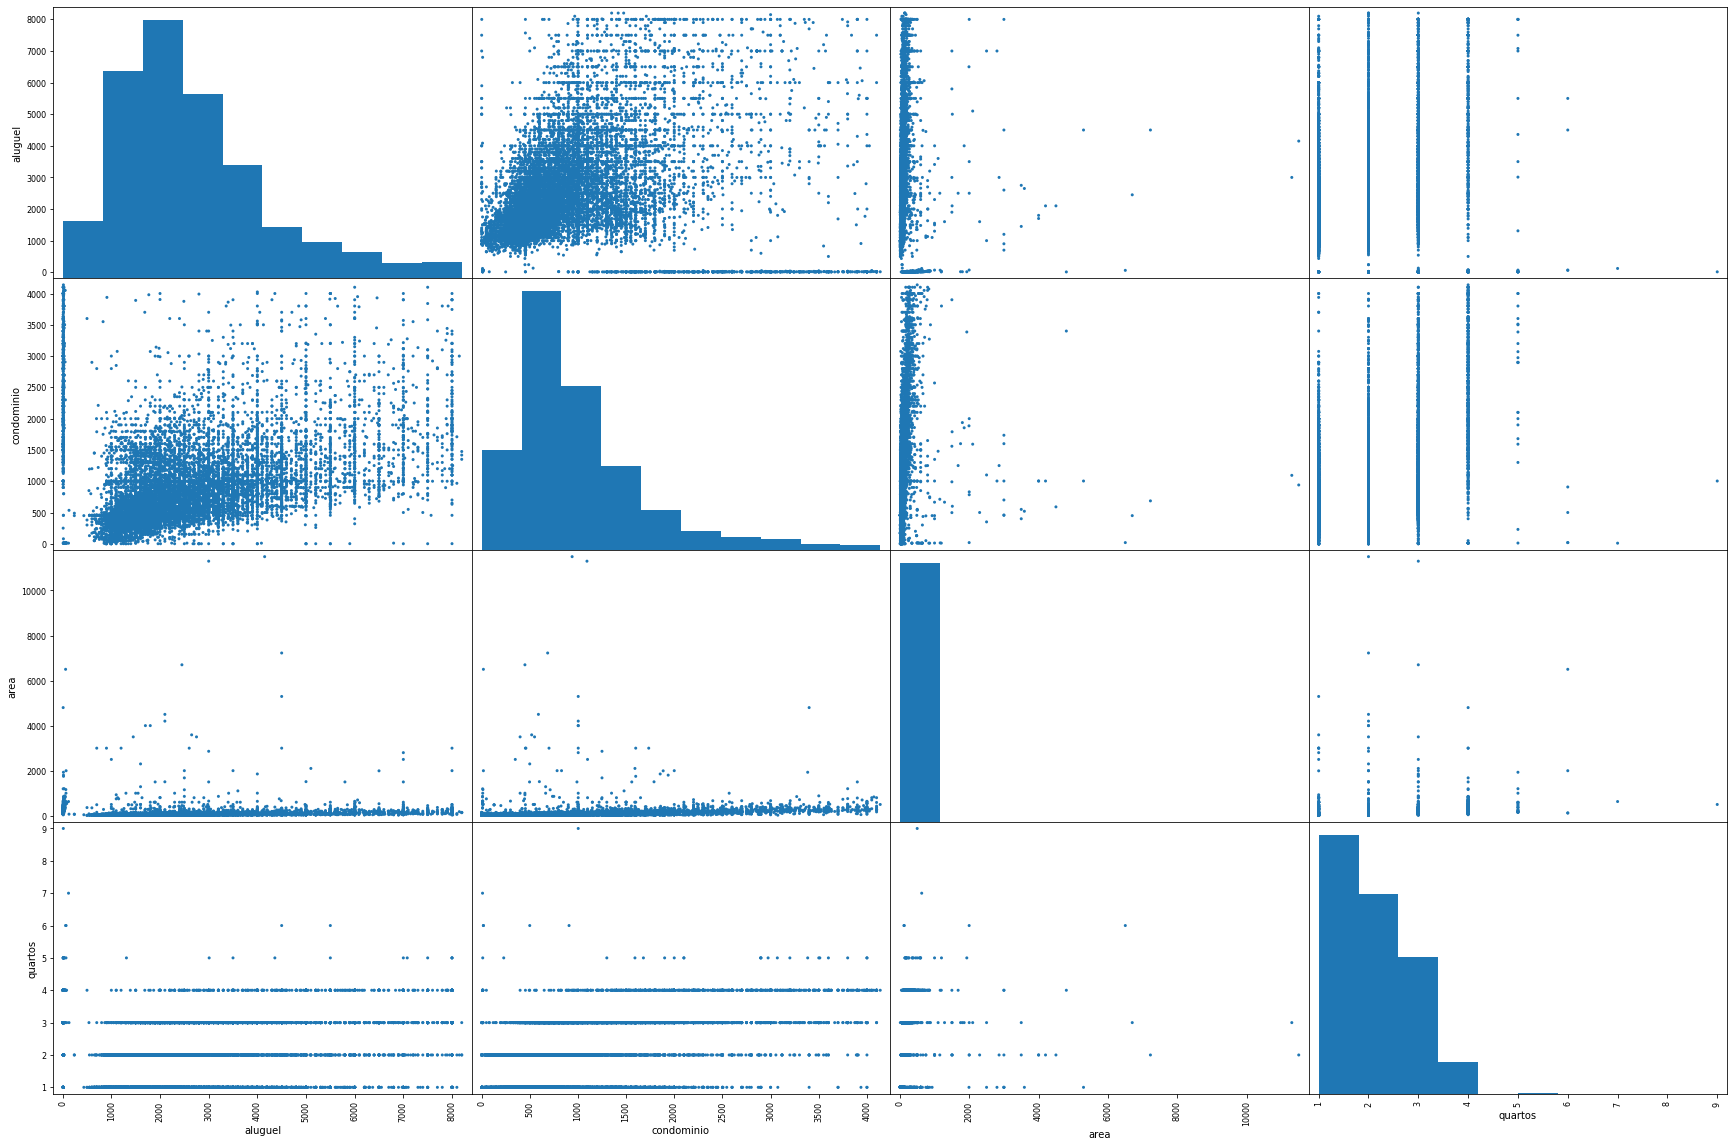

In [9]:
pd.plotting.scatter_matrix(df.drop(['garagem', 'banheiros'], axis=1), alpha = 1, figsize = (30, 20))
plt.show()

We don't really see a strong linear relation between these variables. Still, let's apply our regression:

In [55]:
features = ['area', 'condominio', 'quartos']
x = df[features]
y = df['aluguel']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_test = lr.predict(X_test)

r2_score(y_test, prediction_test)

0.07268373450640608

Our result was pretty bad. Let's see if anything changes if we add the neighborhoods.

## With neighborhoods

In [13]:
df_b = pd.get_dummies(df, columns=['bairro'])

In [14]:
df_b

,aluguel,condominio,area,quartos,banheiros,garagem,anunciante,bairro_Aclimação,bairro_Alto da Boa Vista,bairro_Alto da Lapa,...,bairro_Vila do Bosque,bairro_Vila do Castelo,bairro_Vila do Encontro,bairro_Vila dos Remédios,bairro_Várzea da Barra Funda,bairro_Várzea de Baixo,bairro_Água Branca,bairro_Água Fria,bairro_Água Funda,bairro_Água Rasa
0,4700.0,750.0,82.0,2.0,2.0,2.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3720.0,970.0,50.0,1.0,1.0,0.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3300.0,443.0,85.0,2.0,2.0,1.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1250.0,752.0,35.0,1.0,1.0,1.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2835.0,740.0,72.0,3.0,2.0,1.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14473,1800.0,1000.0,80.0,1.0,1.0,1.0,so-flats,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14474,3000.0,1750.0,84.0,1.0,2.0,2.0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14475,2650.0,703.0,41.0,1.0,1.0,1.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14476,1164.0,380.0,35.0,1.0,1.0,0.0,quintoandar,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x = df_b.drop(['anunciante', 'aluguel', 'banheiros', 'garagem'], axis=1)
y = df_b['aluguel']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_test = lr.predict(X_test)

r2_score(y_test, prediction_test)

0.1701917935924443

Only very slightly better, but still quite bad -- too close to zero, yet.

## Closer look at the area

From the matrix scatterplot we see there's an accumulation of values for the area on the bottom -- bellow 1000 m^2 -- even though we excluded the values below/above 3 Z-scores.

This might be affecting our results.

And, besides, apartaments above 100 m^2 are quite expensive. I'll restrict the model to train on data with smaller area -- say, 200 m^2.

Below we plot the area again, to confirm that there's an accumulation, and then we restrict the apartaments to smaller areas.

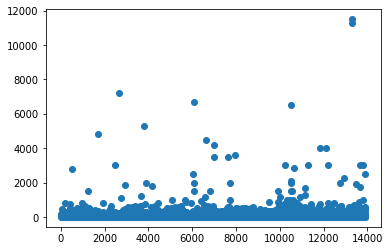

In [25]:
plt.scatter(range(0,len(df['area'])), df['area'])

In [32]:
smaller = df[df['area'] <= 200]

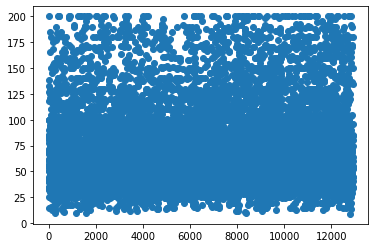

In [33]:
plt.scatter(range(0,len(smaller['area'])), smaller['area'])

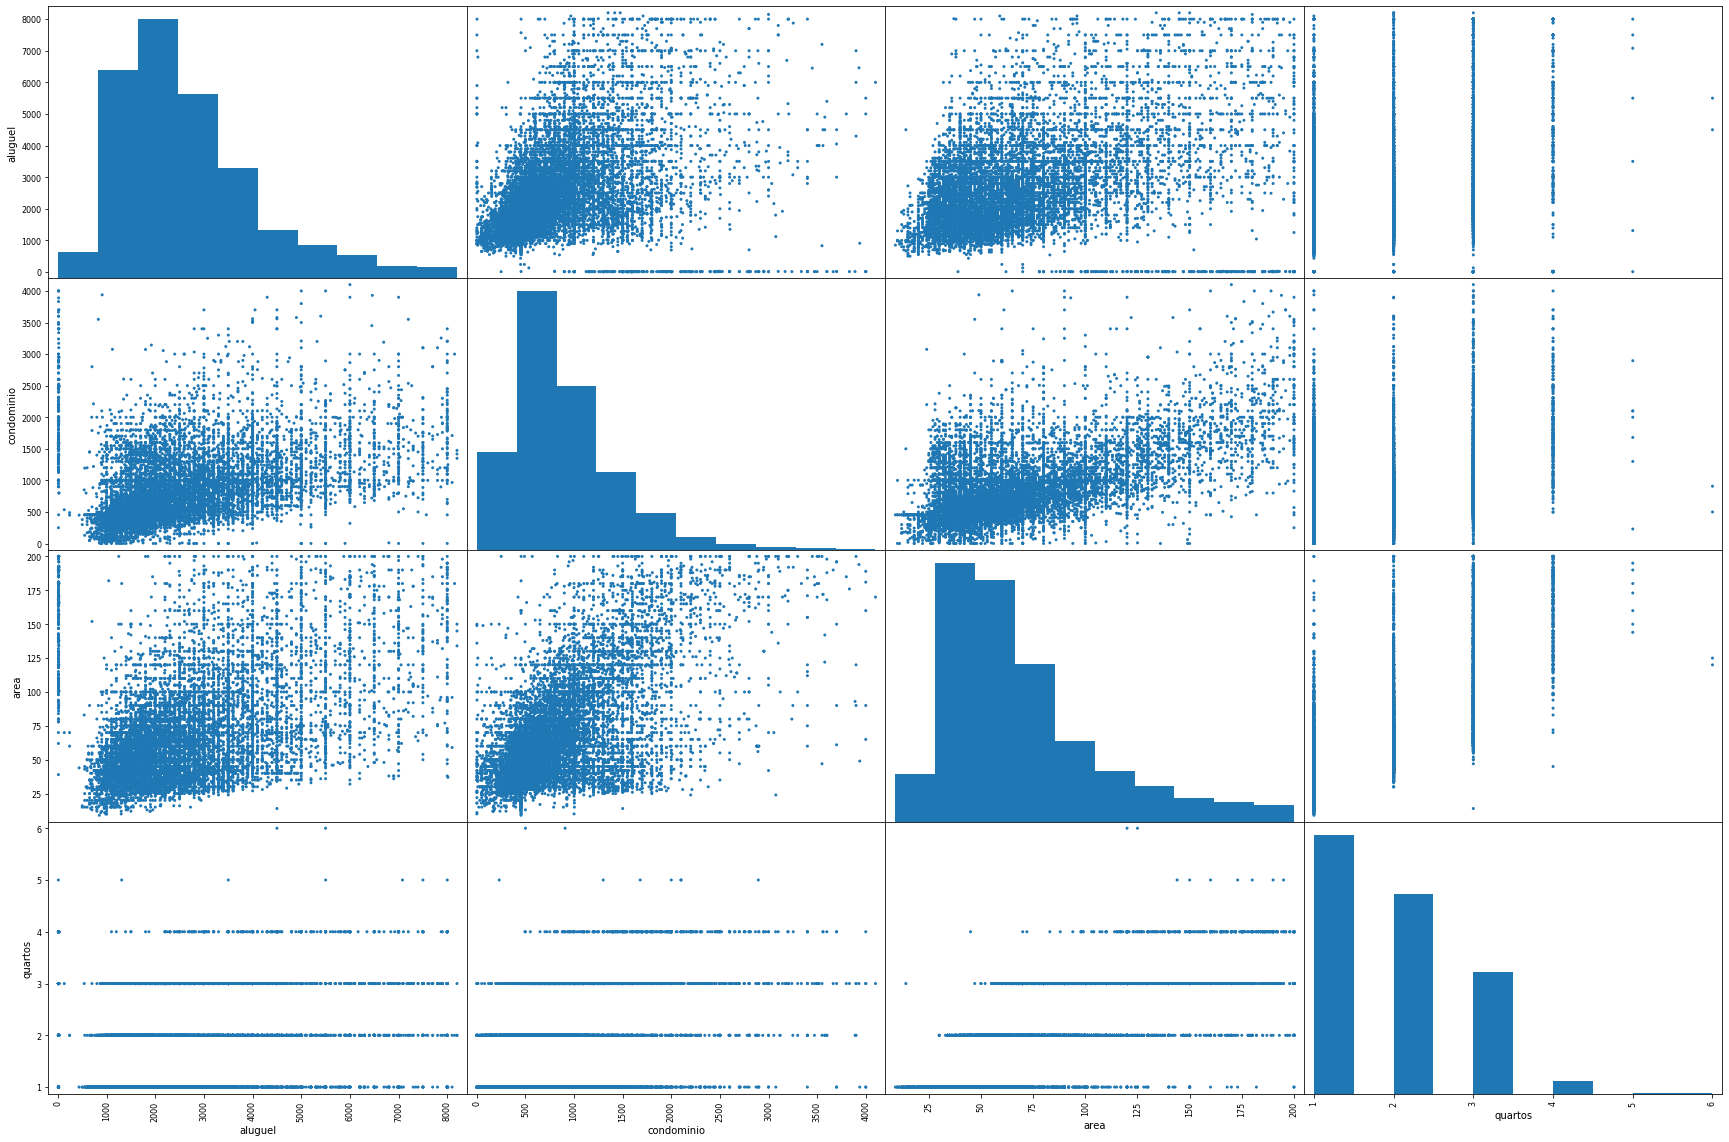

In [34]:
pd.plotting.scatter_matrix(smaller.drop(['garagem', 'banheiros'], axis=1), alpha = 1, figsize = (30, 20))
plt.show()

The relationship between `area` and `aluguel` indeed got a bit better -- and it does conforms to our intuition of pricing rent.

In [52]:
features = ['area', 'condominio', 'quartos']
x = smaller[features]
y = smaller['aluguel']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction_test = lr.predict(X_test)

r2_score(y_test, prediction_test)

0.1964422506106588

### Changing the target for the total price

In [53]:
features = ['area', 'quartos']
x = smaller[features]
y = smaller['aluguel'] + smaller['condominio']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)
lr = LinearRegression()

lr.fit(X_train, y_train)
prediction_test = lr.predict(X_test)

r2_score(y_test, prediction_test)

0.2985766744789553

### Again with the neighborhoods

In [57]:
smaller_b = pd.get_dummies(df, columns=['bairro'])
x = smaller_b.drop(['anunciante', 'aluguel', 'banheiros', 'garagem', 'condominio'], axis=1)
y = smaller_b['aluguel'] + smaller_b['condominio']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)
lr = LinearRegression()

lr.fit(X_train, y_train)
prediction_test = lr.predict(X_test)
r2_score(y_test, prediction_test)

-1976112333329589.0

This is the worst result of all, and its a little counter intuitive: the neighborhoods, from common experience, determines the price of an apartament more than the area.

## Conclusion

Our best performance was an r2 of almost `.3`, which represents an impressive `+300%` increase from our initial r2 (our initial was the worst excluding the last one: including neighborhoods, with smaller areas and target as total price).

Still, its quite bad -- the common interpretation is that only `30%` of our data is accounted by our model. We could try to transform our data to optimze the results further, but we believe its better to invest the time on other more powrful methods (like random forests and xgboost, which we'll do in another notebook).